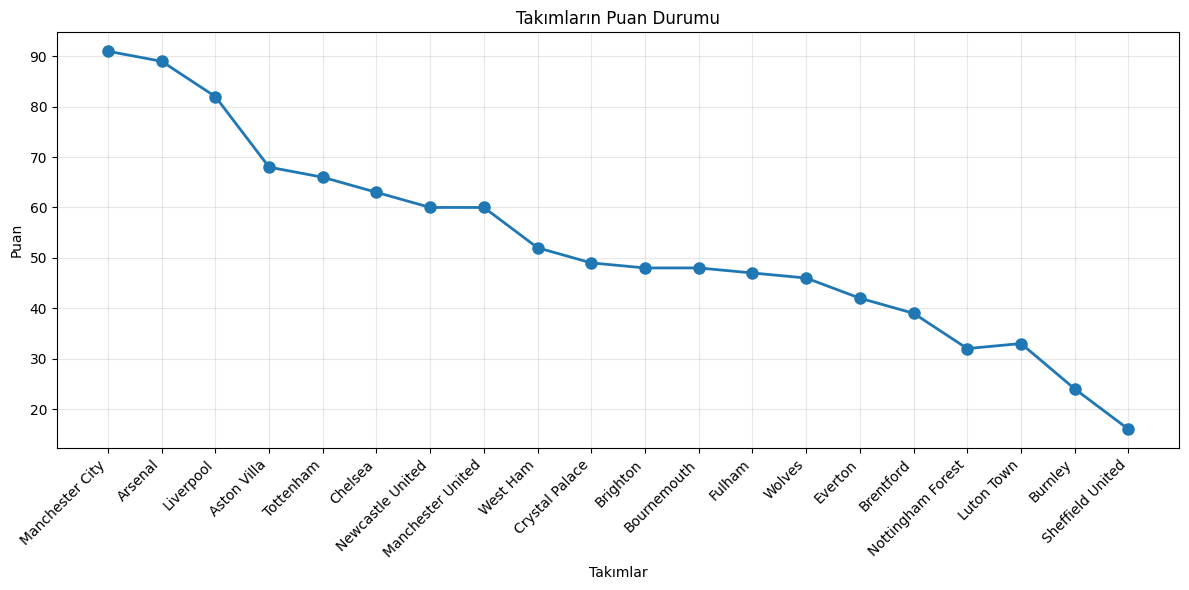

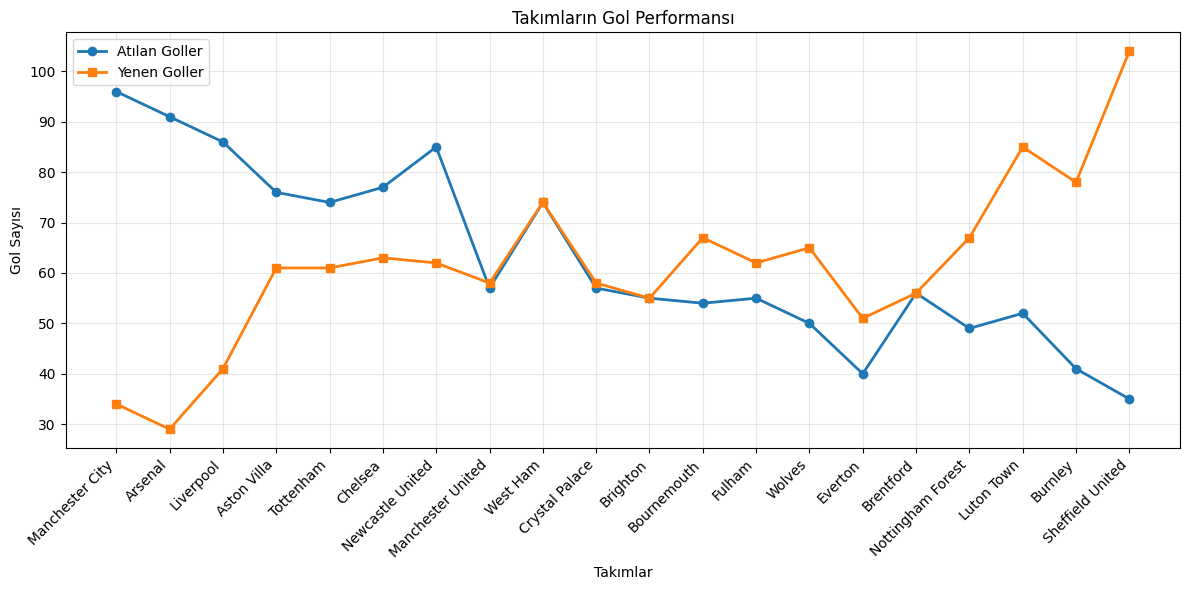

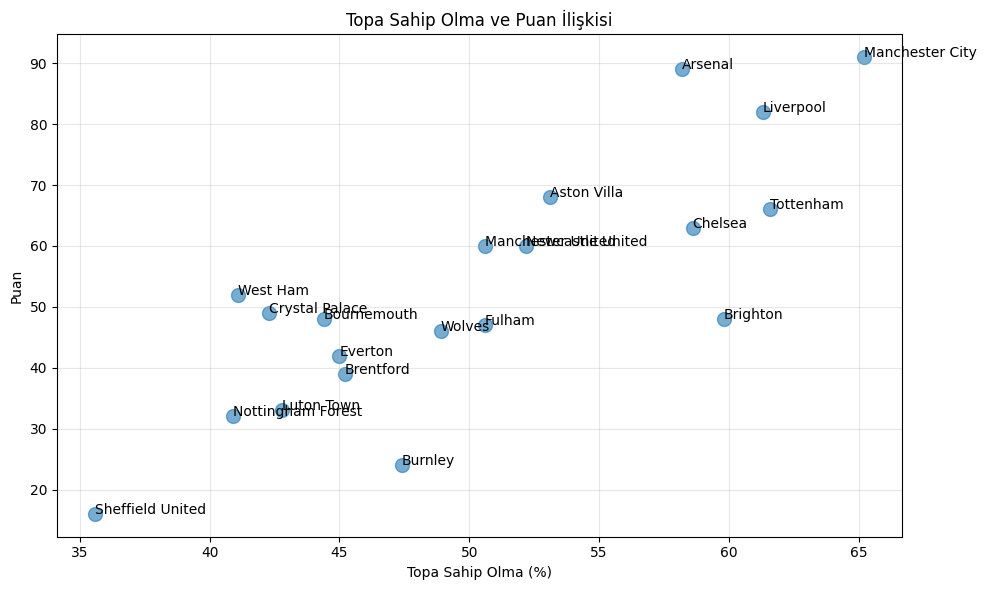

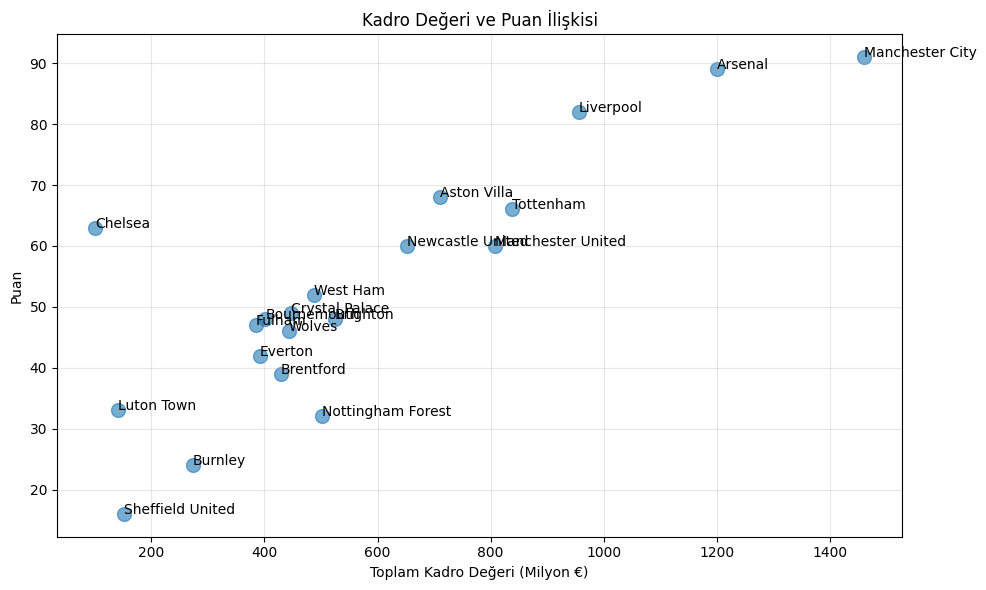

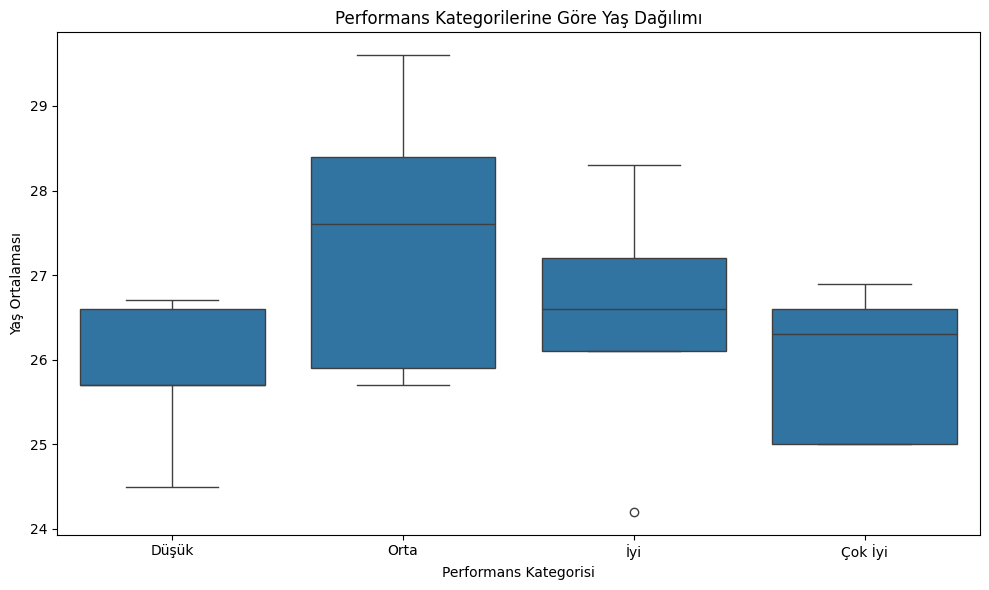

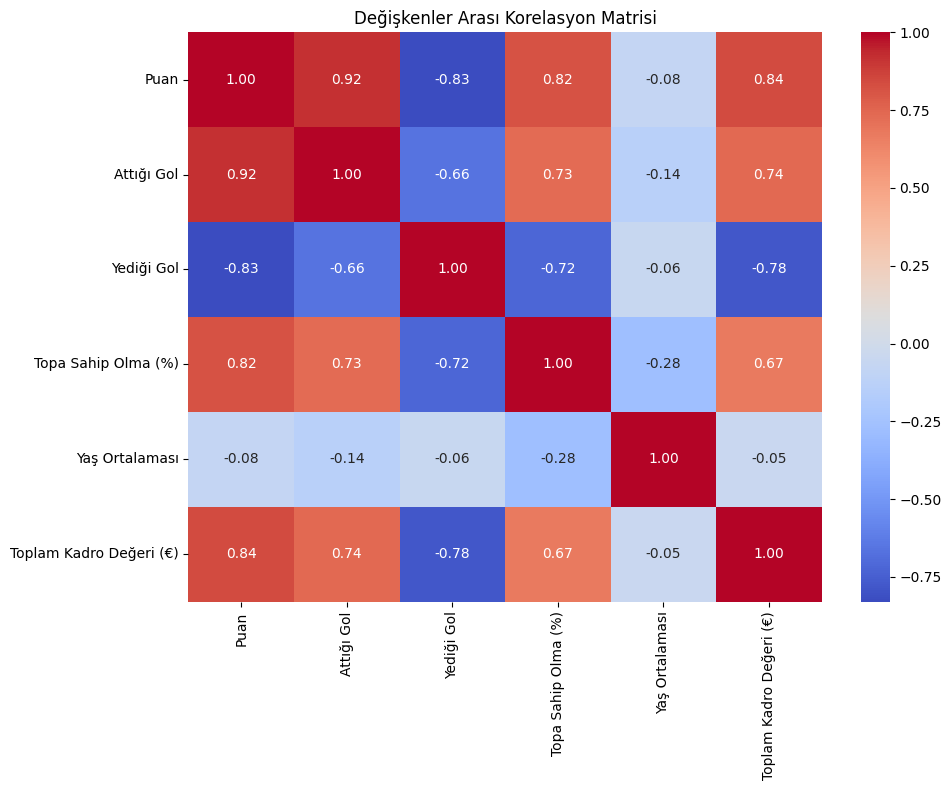


Önemli İstatistikler:

Tüm Takımların Puan ve Gol İstatistikleri:
                Takım  Puan  Attığı Gol  Yediği Gol  Topa Sahip Olma (%)
0     Manchester City    91          96          34                 65.2
1             Arsenal    89          91          29                 58.2
2           Liverpool    82          86          41                 61.3
3         Aston Villa    68          76          61                 53.1
4           Tottenham    66          74          61                 61.6
5             Chelsea    63          77          63                 58.6
6    Newcastle United    60          85          62                 52.2
7   Manchester United    60          57          58                 50.6
8            West Ham    52          74          74                 41.1
9      Crystal Palace    49          57          58                 42.3
11        Bournemouth    48          54          67                 44.4
10           Brighton    48          55          55      

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi yükle
df = pd.read_excel('dsa210data.xlsx')

# 1. Puan Durumu (Plot)
plt.figure(figsize=(12, 6))
plt.plot(df['Takım'], df['Puan'], marker='o', linewidth=2, markersize=8)
plt.xticks(rotation=45, ha='right')
plt.title('Takımların Puan Durumu')
plt.xlabel('Takımlar')
plt.ylabel('Puan')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Gol Performansı (Plot)
plt.figure(figsize=(12, 6))
plt.plot(df['Takım'], df['Attığı Gol'], marker='o', label='Atılan Goller', linewidth=2)
plt.plot(df['Takım'], df['Yediği Gol'], marker='s', label='Yenen Goller', linewidth=2)
plt.xticks(rotation=45, ha='right')
plt.title('Takımların Gol Performansı')
plt.xlabel('Takımlar')
plt.ylabel('Gol Sayısı')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Topa Sahip Olma ve Puan İlişkisi (Scatter)
plt.figure(figsize=(10, 6))
plt.scatter(df['Topa Sahip Olma (%)'], df['Puan'], alpha=0.6, s=100)
for i, txt in enumerate(df['Takım']):
    plt.annotate(txt, (df['Topa Sahip Olma (%)'].iloc[i], df['Puan'].iloc[i]))
plt.title('Topa Sahip Olma ve Puan İlişkisi')
plt.xlabel('Topa Sahip Olma (%)')
plt.ylabel('Puan')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Kadro Değeri ve Puan İlişkisi (Scatter)
plt.figure(figsize=(10, 6))
plt.scatter(df['Toplam Kadro Değeri (€)']/1e6, df['Puan'], alpha=0.6, s=100)
for i, txt in enumerate(df['Takım']):
    plt.annotate(txt, (df['Toplam Kadro Değeri (€)'].iloc[i]/1e6, df['Puan'].iloc[i]))
plt.title('Kadro Değeri ve Puan İlişkisi')
plt.xlabel('Toplam Kadro Değeri (Milyon €)')
plt.ylabel('Puan')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Yaş ve Performans İlişkisi (Boxplot)
plt.figure(figsize=(10, 6))
df['Performans_Kategori'] = pd.qcut(df['Puan'], q=4, labels=['Düşük', 'Orta', 'İyi', 'Çok İyi'])
sns.boxplot(data=df, x='Performans_Kategori', y='Yaş Ortalaması')
plt.title('Performans Kategorilerine Göre Yaş Dağılımı')
plt.xlabel('Performans Kategorisi')
plt.ylabel('Yaş Ortalaması')
plt.tight_layout()
plt.show()

# 6. Seaborn ile Korelasyon Matrisi
plt.figure(figsize=(10, 8))
correlation_cols = ['Puan', 'Attığı Gol', 'Yediği Gol', 'Topa Sahip Olma (%)', 
                   'Yaş Ortalaması', 'Toplam Kadro Değeri (€)']
correlation_matrix = df[correlation_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Değişkenler Arası Korelasyon Matrisi')
plt.tight_layout()
plt.show()

# İstatistiksel özet
print("\nÖnemli İstatistikler:")
print("\nTüm Takımların Puan ve Gol İstatistikleri:")
print(df[['Takım', 'Puan', 'Attığı Gol', 'Yediği Gol', 'Topa Sahip Olma (%)']].sort_values('Puan', ascending=False))

# Korelasyon analizi
print("\nÖnemli Korelasyonlar:")
print(f"Kadro Değeri - Puan Korelasyonu: {df['Toplam Kadro Değeri (€)'].corr(df['Puan']):.2f}")
print(f"Topa Sahip Olma - Puan Korelasyonu: {df['Topa Sahip Olma (%)'].corr(df['Puan']):.2f}")
print(f"Atılan Gol - Puan Korelasyonu: {df['Attığı Gol'].corr(df['Puan']):.2f}")